1. Installing MNE and MNE_CONNECTIVITY

In [1]:
!pip install mne
!pip install mne_connectivity

2. Importing modules

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import mne_connectivity
import glob
import getpass
import importlib
import functions
import spectrogram_plotting_functions
importlib.reload(functions)
importlib.reload(spectrogram_plotting_functions)

<module 'spectrogram_plotting_functions' from 'c:\\Users\\sinha\\Documents\\GitHub\\cpl_analysis_naman\\spectrogram_plotting_functions.py'>

3. Generating synthetic data to test mne

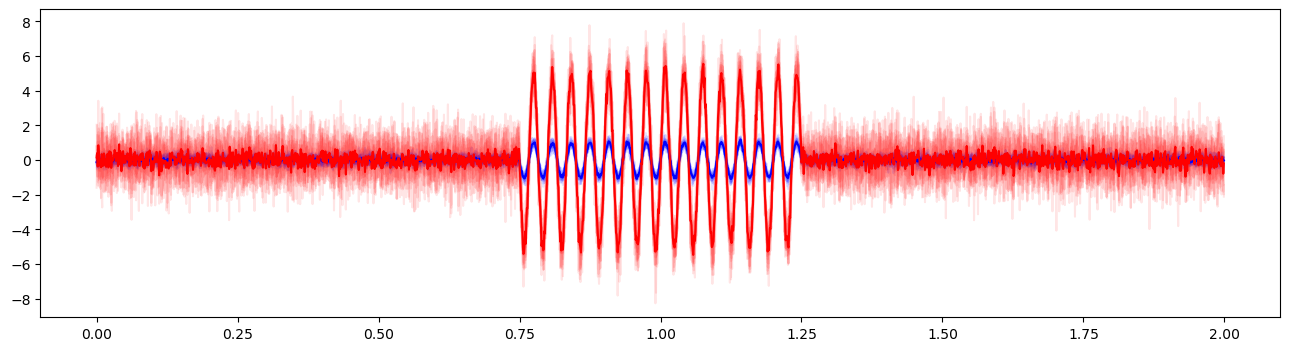

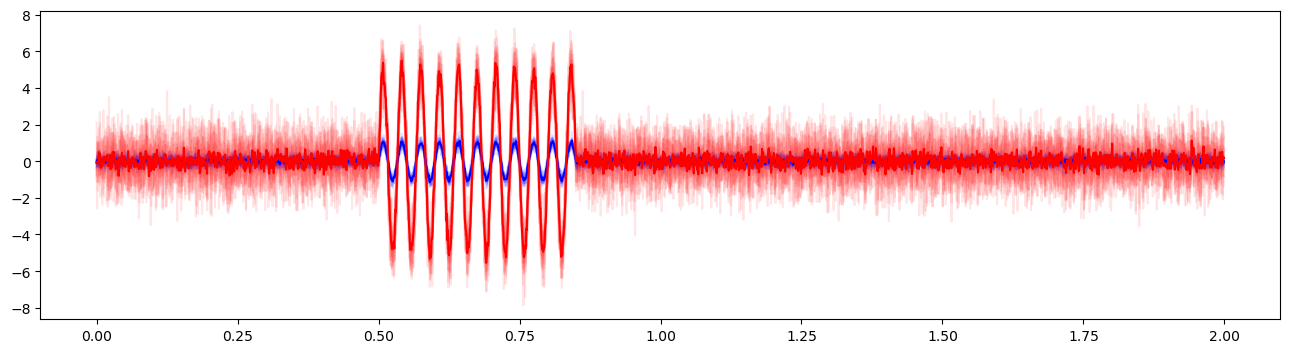

In [14]:
## Defining a function that takes the time, sampling frequency, and frequency of the oscillation and returns a epoch of generated LFP data

def generate_epoch(end_time, fs, osc_freq, osc_time_start, osc_time_end):

    times = np.arange(0, end_time, 1/fs)

    osc = np.sin(2 * np.pi * times[:] * osc_freq)[osc_time_start:osc_time_end]
    trials = 10
    epochs = np.empty((trials, 2, len(times)))
    plt.figure(figsize=(16,4))

    for trial in range(0, trials):
        lfp1 = np.random.normal(0, .2, size=times.shape)
        lfp2 = np.random.normal(0, .2, size=times.shape)
        lfp1[osc_time_start:osc_time_end] += osc
        lfp2[osc_time_start:osc_time_end] += osc  # Different amplitude for lfp2
        lfp2=lfp2*5
        lfp1 = lfp1
        epochs[trial, 0, :] = lfp1
        epochs[trial, 1, :] = lfp2
        plt.plot(times, lfp1, label='lfp1', color='blue', alpha=0.1)
        plt.plot(times, lfp2, label='lfp2', color='red', alpha=0.1)
    plt.plot(times, np.mean(epochs[:,0,:], axis=0), color='blue', label='lfp1')
    plt.plot(times, np.mean(epochs[:,1,:], axis=0), color='red',label='lfp2')
    return epochs, times

thirty_epoch, thirty_times = generate_epoch(2, 1000, 30, 750, 1250)
ten_epoch, ten_times = generate_epoch(2, 1000, 30, 500, 850)

3.2 Now we test the coherence function on the generated data

Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 3.0Hz..99.0Hz (97 points)
    using CWT with Morlet wavelets to estimate spectra
    the following metrics will be computed: Coherence
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
[Connectivity computation done]


Text(0, 0.5, 'Frequency (Hz)')

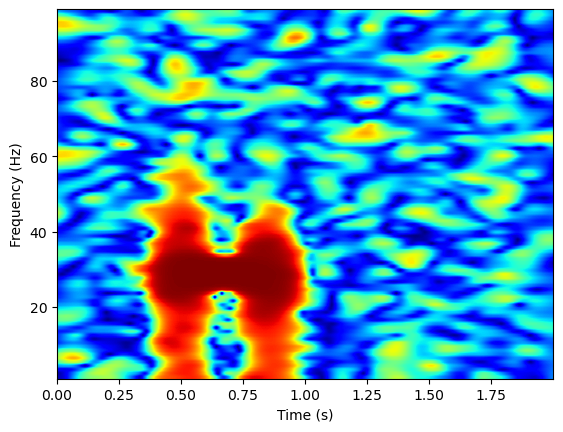

In [15]:
fs=1000
freqs = np.arange(1,100)
n_cycles = freqs/2
con = mne_connectivity.spectral_connectivity_epochs(ten_epoch, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))                                                   
coh = con.get_data()

plt.imshow(np.squeeze(coh), extent=[ten_times[0], ten_times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

3.2.2 Using gc method to calculate Granger Causality for simulated data

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 1.0Hz..100.0Hz (199 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: GC
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
Computing GC for connection 1 of 1


C:\Users\sinha\AppData\Local\Temp\ipykernel_2892\2237911090.py:7: RuntimeWarning: There were no Annotations stored in <EpochsArray | 10 events (all good), 0 – 1.999 s (baseline off), ~320 kB, data loaded,
 '1': 10>, so metadata was not modified.
  con_ab = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
C:\Users\sinha\AppData\Local\Temp\ipykernel_2892\2237911090.py:7: RuntimeWarning: fmin=1.000 Hz corresponds to 2.000 < 5 cycles based on the epoch length 2.000 sec, need at least 5.000 sec epochs or fmin=2.500. Spectrum estimate will be unreliable.
  con_ab = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
100%|██████████| frequency blocks : 199/199 [00:00<00:00, 2777.16it/s]

[Connectivity computation done]
Connectivity computation...
    computing connectivity for 1 connections
    using t=0.000s..1.999s for estimation (2000 points)
    frequencies: 1.0Hz..100.0Hz (199 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: GC
    computing cross-spectral density for epoch 1
    computing cross-spectral density for epoch 2
    computing cross-spectral density for epoch 3
    computing cross-spectral density for epoch 4
    computing cross-spectral density for epoch 5
    computing cross-spectral density for epoch 6
    computing cross-spectral density for epoch 7
    computing cross-spectral density for epoch 8
    computing cross-spectral density for epoch 9
    computing cross-spectral density for epoch 10
Computing GC for connection 1 of 1



C:\Users\sinha\AppData\Local\Temp\ipykernel_2892\2237911090.py:11: RuntimeWarning: There were no Annotations stored in <EpochsArray | 10 events (all good), 0 – 1.999 s (baseline off), ~320 kB, data loaded,
 '1': 10>, so metadata was not modified.
  con_ba = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
C:\Users\sinha\AppData\Local\Temp\ipykernel_2892\2237911090.py:11: RuntimeWarning: fmin=1.000 Hz corresponds to 2.000 < 5 cycles based on the epoch length 2.000 sec, need at least 5.000 sec epochs or fmin=2.500. Spectrum estimate will be unreliable.
  con_ba = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
100%|██████████| frequency blocks : 199/199 [00:00<00:00, 2742.11it/s]

[Connectivity computation done]


Text(0.5, 0.98, 'GC: [A => B]')

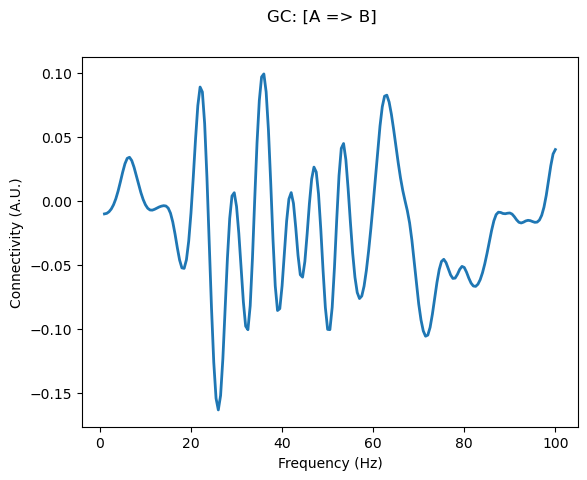

In [13]:
fs=1000
info=mne.create_info(ch_names=['lfp1', 'lfp2'], sfreq=fs, ch_types='eeg')
epochs_mne = mne.EpochsArray(ten_epoch, info)
indices_ab = ([np.array([1])], [np.array([0])])  # Seed: channel 0, Target: channel 1
indices_ba= ([np.array([0])], [np.array([1])])  # Seed: channel 1, Target: channel 0

con_ab = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
                                                    fmin=1, fmax=100, n_jobs=1,rank=(np.array([1]), np.array([1])),
                                                    verbose=True,
                                                    indices=indices_ab)
con_ba = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='gc', sfreq=int(fs),
                                                    fmin=1, fmax=100, n_jobs=1,rank=(np.array([1]), np.array([1])),
                                                    verbose=True,
                                                    indices=indices_ba)

net_gc=con_ab.get_data() - con_ba.get_data()
freqs = con_ab.freqs
fig, axis = plt.subplots(1, 1)
axis.plot(freqs, net_gc[0], linewidth=2)
axis.set_xlabel("Frequency (Hz)")
axis.set_ylabel("Connectivity (A.U.)")
fig.suptitle("GC: [A => B]")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import mne
# Assuming `ten_epoch` is already defined and contains your epochs data, and `fs` is the sampling frequency

info = mne.create_info(ch_names=['lfp1', 'lfp2'], sfreq=fs, ch_types='eeg')
epochs_mne = mne.EpochsArray(ten_epoch, info)
indices_ab =  (0,1) # Seed: channel 0, Target: channel 1
indices_ba = (1,0)  # Seed: channel 1, Target: channel 0

# Calculate PLI (Phase Lag Index)
con_ab_pli = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='pli', sfreq=int(fs),
                                             fmin=1, fmax=100, n_jobs=1, rank=(np.array([1]), np.array([1])),
                                             verbose=True, indices=indices_ab)
con_ba_pli = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='pli', sfreq=int(fs),
                                             fmin=1, fmax=100, n_jobs=1, rank=(np.array([1]), np.array([1])),
                                             verbose=True, indices=indices_ba)

net_pli = con_ab_pli.get_data() - con_ba_pli.get_data()  # Net PLI between channels
freqs = con_ab_pli.freqs

# Plotting the results
fig, axis = plt.subplots(1, 1)
axis.plot(freqs, net_pli[0], linewidth=2)
axis.set_xlabel("Frequency (Hz)")
axis.set_ylabel("Net PLI (A.U.)")
fig.suptitle("PLI: [A => B]")
plt.show()

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Connectivity computation...


C:\Users\sinha\AppData\Local\Temp\ipykernel_19168\1493979805.py:12: RuntimeWarning: There were no Annotations stored in <EpochsArray | 10 events (all good), 0 – 1.999 s (baseline off), ~320 kB, data loaded,
 '1': 10>, so metadata was not modified.
  con_ab_pli = mne_connectivity.spectral_connectivity_epochs(epochs_mne, method='pli', sfreq=int(fs),


TypeError: object of type 'int' has no len()

3.3 Trying to take a average of the coherence to see how averaging works

In [ ]:
epoch_1, times_1 = generate_epoch(2, 1000, 30, 750, 1250)
epoch_2, times_2 = generate_epoch(2, 1000, 10, 750, 1250)

fs=1000
freqs = np.arange(1,100)
n_cycles = freqs/2
con_1 = mne_connectivity.spectral_connectivity_epochs(epoch_1, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))

con_2 = mne_connectivity.spectral_connectivity_epochs(epoch_2, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=True,
                                                   indices=(np.array([0]), np.array([1])))

coh_1 = con_1.get_data()
coh_2 = con_2.get_data()

print(coh_1.shape)
print(coh_2.shape)

new_array= np.array([coh_1, coh_2])
print(new_array.shape)
new_array_mean = np.mean(new_array, axis=0)
new_array_sum = np.sum(new_array, axis=0)

# Compare the mean and sum arrays element-wise
if np.array_equal(new_array_mean, new_array_sum):
    print('The mean and sum are the same')
else:
    print('The mean and sum are different')

print(new_array_mean.shape)
print(new_array_sum.shape)

# Print some values for debugging
print("Mean array values:", new_array_mean)
print("Sum array values:", new_array_sum)
# Determine the common vmin and vmax for the colormap
vmin = min(np.min(coh_1), np.min(coh_2), np.min(new_array_mean))#, np.min(new_array_sum))
vmax = max(np.max(coh_1), np.max(coh_2), np.max(new_array_mean))#, np.max(new_array_sum))


fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
axs = axs.flatten()

im = axs[0].imshow(np.squeeze(coh_1), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[0].set_title('10 Hz')

axs[1].imshow(np.squeeze(coh_2), extent=[times_2[0], times_2[-1], freqs[0], freqs[-1]],
              aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[1].set_title('30 Hz')

# axs[2].imshow(np.squeeze(new_array_mean), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
#               aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
# axs[2].set_title('Mean')

axs[2].imshow(np.squeeze(new_array_sum), extent=[times_2[0], times_2[-1], freqs[0], freqs[-1]],
              aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
axs[2].set_title('Sum')

# # Plot the difference between mean and sum
# difference = new_array_sum - new_array_mean
# axs[4].imshow(np.squeeze(difference), extent=[times_1[0], times_1[-1], freqs[0], freqs[-1]],
#               aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
# axs[4].set_title('Difference (Sum - Mean)')

for ax in axs:
    ax.set_ylabel('Frequency (Hz)')
    ax.set_xlabel('Time (s)')

cbar = fig.colorbar(axs[2].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Coherence')

4. Loading up the real data

In [3]:

user= (getpass.getuser())
print("Hello", user)

base='C:\\Users\\{}\\Dropbox\\CPLab'.format(user)
files = glob.glob(base+'\\all_data_mat\\*.mat')
savepath = base+'\\results\\'
print(files)

Hello sinha
['C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230529_dk1_nocontext.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230529_dk3_nocontext.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230529_dk5_nocontext.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230529_dk6_nocontext.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230531_dk1_nocontext_day2.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230531_dk3_nocontext_day2.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230531_dk5_nocontext_day2.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230531_dk6_nocontext_day2.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230609_dk1_BW_nocontext_day1.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230609_dk3_BW_nocontext_day1.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230610_dk1_BW_nocontext_day2.mat', 'C:\\Users\\sinha\\Dropbox\\CPLab\\all_data_mat\\20230610_dk3_BW_nocontext_day2.mat',

In [4]:
keyboard_dict={'98':'b','119':'w','120':'nc','49':'1','48':'0'}

In [7]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#files=[f'C:\\Users\\{user}\\Dropbox\\CPLab\\all_data_mat\\20230616_dk6_BW_context_day2.mat']
event_data_df=[]
con_data_df=[]
shuffled_event_data_df=[]
events_codes_all = {}
random_baseline_data=[]
baseline_lfp_all=[]

for file_num,file in enumerate(files):
    #if 'dk1' in file:
        
        print(file)
        base_name = os.path.basename(file)
        base_name, _ = os.path.splitext(base_name)

        date, rat_id, task = functions.exp_params(base_name)
        print(date, rat_id, task)
        if task == 'nocontextday2' or task == 'nocontextos2':
            task = 'nocontext'
        print(date, rat_id, task)

        f = h5py.File(file, 'r')
        channels = list(f.keys())
        print(channels)
         
        if not any("AON" in channel or "vHp" in channel for channel in channels):
            print("No AON or vHp channels in this file")
            continue

        events,reference_electrode=functions.get_keyboard_and_ref_channels(f,channels)

    #finding global start and end time of all channels, since they start and end recordings at different times
        global_start_time, global_end_time=functions.find_global_start_end_times(f,channels)
        
        ## Reference electrode finding and padding
        reference_time = np.array(reference_electrode['times']).flatten()
        reference_value = np.array(reference_electrode['values']).flatten()
        padd_ref_data,padded_ref_time=functions.pad_raw_data_raw_time(reference_value,reference_time,global_start_time,global_end_time,sampling_rate=2000)

        events_codes = np.array(events['codes'][0])
        events_times = np.array(events['times'][0])
        events_codes_all[base_name] = events_codes
        epochs = functions.generate_epochs_with_first_event(events_codes, events_times)
        #epochs = functions.generate_specific_num_of_epochs_with_first_event(events_codes, events_times,5)
        aon_lfp_channels=[x for x in channels if 'AON' in x ]
        vHp_lfp_channels=[x for x in channels if 'vHp' in x ]
        all_channels=np.concatenate((aon_lfp_channels,vHp_lfp_channels))
        print(all_channels)
        
        mne_baseline_data=np.zeros((1,len(all_channels),4000))
        mne_epoch_door_before=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_door_after=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_dig_before=np.zeros((len(epochs),len(all_channels),4000))
        mne_epoch_dig_after=np.zeros((len(epochs),len(all_channels),4000))
        
        first_event = events_times[0]
        
        for channel_num,channeli in enumerate(all_channels):
            if "AON" in channeli or "vHp" in channeli:
                channel_id = channeli
                data_all = f[channeli]
                raw_data = np.array(data_all['values']).flatten()
                raw_time = np.array(data_all['times']).flatten()
                sampling_rate = int(1 / data_all['interval'][0][0])
                print(raw_data.shape, raw_time.shape, sampling_rate)
                
                padded_data,padded_time=functions.pad_raw_data_raw_time(raw_data,raw_time,global_start_time,global_end_time,sampling_rate)
                subtracted_data = padded_data - padd_ref_data
                raw_data=subtracted_data
                notch_filtered_data = functions.iir_notch(raw_data, sampling_rate, 60)
                
                data_before, time, baseline_mean, baseline_std=functions.baseline_data_normalization(notch_filtered_data, raw_time, first_event, sampling_rate)
                normalized_data=functions.zscore_event_data(notch_filtered_data, baseline_mean, baseline_std)

                #baseline_row=[rat_id,task,channel_id,[data_before]]
                #baseline_lfp_all.append(baseline_row)
                #normalized_data, time, data_before = functions.data_normalization(notch_filtered_data, raw_time, first_event, sampling_rate)
                baseline_data_truncated= data_before[-4000:]
                
                mne_baseline_data[0,channel_num,:]=list(baseline_data_truncated)
                
                total = normalized_data

                
                for i, epochi in enumerate(epochs):
                    door_timestamp = epochi[0][0]
                    trial_type = epochi[0][1]
                    dig_type = epochi[1, 1]
                    print(dig_type)
                    dig_timestamp = epochi[1, 0]
                    print(door_timestamp, trial_type, dig_timestamp, dig_type)
                    data_complete_trial = functions.extract_complete_trial_data(total, time, door_timestamp, dig_timestamp, sampling_rate)
                    #Here we will extract and store the events data
                    data_door_before,data_door_after=functions.extract_door_data(total, time, door_timestamp, sampling_rate)    
                    data_dig_before, data_dig_after=functions.extract_dig_data(total,time, dig_timestamp, sampling_rate)
                    event_data_list=[data_door_before,data_door_after,data_dig_before,data_dig_after]
                    [functions.zscore_event_data(event_data, baseline_mean ,baseline_std) for event_data in event_data_list]
                    mne_epoch_door_before[i,channel_num,:]=list(event_data_list[0])
                    mne_epoch_door_after[i,channel_num,:]=list(event_data_list[1])
                    mne_epoch_dig_before[i,channel_num,:]=list(event_data_list[2])
                    mne_epoch_dig_after[i,channel_num,:]=list(event_data_list[3])
        if len(all_channels)>0:
            fs=2000
            freqs = np.arange(1,100)
            n_cycles = freqs/2
            info = mne.create_info(ch_names=list(all_channels), sfreq=fs, ch_types='eeg')
            mne_baseline = mne.EpochsArray(mne_baseline_data, info)
            mne_epoch_door_before = mne.EpochsArray(mne_epoch_door_before, info)
            mne_epoch_door_after= mne.EpochsArray(mne_epoch_door_after, info)
            mne_epoch_dig_before = mne.EpochsArray(mne_epoch_dig_before, info)
            mne_epoch_dig_after = mne.EpochsArray(mne_epoch_dig_after, info)
            row_list=[file_num,rat_id,task,mne_baseline,mne_epoch_door_before,mne_epoch_door_after,mne_epoch_dig_before,mne_epoch_dig_after]
            con_data_df.append(row_list)

        # fs=2000
        # freqs = np.arange(1,100)
        # n_cycles = freqs/2
        # info = mne.create_info(ch_names=list(all_channels), sfreq=fs, ch_types='eeg')
        # mne_epoch_door_before = mne.EpochsArray(mne_epoch_door_before, info)
        # mne_epoch_door_after= mne.EpochsArray(mne_epoch_door_after, info)
        # mne_epoch_dig_before = mne.EpochsArray(mne_epoch_dig_before, info)
        # mne_epoch_dig_after = mne.EpochsArray(mne_epoch_dig_after, info)
        # row_list=[rat_id,task,mne_epoch_door_before,mne_epoch_door_after,mne_epoch_dig_before,mne_epoch_dig_after]
        # con_data_df.append(row_list)
#baseline_lfp_all = pd.DataFrame(baseline_lfp_all, columns=['rat', 'experiment', 'channel', 'data'])
con_data_df=pd.DataFrame(con_data_df, columns=['experiment','rat_id','task','mne_baseline','mne_epoch_door_before','mne_epoch_door_after','mne_epoch_dig_before','mne_epoch_dig_after'])


C:\Users\sinha\Dropbox\CPLab\all_data_mat\20230529_dk1_nocontext.mat
20230529 dk1 nocontext
20230529 dk1 nocontext
['Keyboard', 'LFP1_AON', 'LFP1_vHp', 'LFP2_AON', 'LFP2_vHp', 'LFP3_AON', 'LFP4_AON', 'Ref', 'Respirat', 'file']
['LFP1_AON' 'LFP2_AON' 'LFP3_AON' 'LFP4_AON' 'LFP1_vHp' 'LFP2_vHp']
(1516022,) (1516022,) 2000
notch filter applied
normalizing data
49.0
181.20385499999998 120.0 182.713855 49.0
48.0
237.771855 120.0 239.46185499999999 48.0
49.0
279.551855 120.0 280.29184999999995 49.0
48.0
348.953855 120.0 349.84385 48.0
49.0
466.78984999999994 120.0 468.25985499999996 49.0
49.0
526.9038549999999 120.0 528.223855 49.0
49.0
570.771855 120.0 571.4418549999999 49.0
48.0
617.237855 120.0 618.4178549999999 48.0
49.0
669.49786 120.0 670.737855 49.0
49.0
705.3358549999999 120.0 706.5758549999999 49.0
(1516022,) (1516022,) 2000
notch filter applied
normalizing data
49.0
181.20385499999998 120.0 182.713855 49.0
48.0
237.771855 120.0 239.46185499999999 48.0
49.0
279.551855 120.0 280.2918

Calculating Coherence during Baseline Time

Baseline Coherence over frequencies

In [ ]:
con_data_df_clean=con_data_df[con_data_df['rat_id']!='dk3']
BWcontext_data=con_data_df_clean[(con_data_df_clean['task']=='BWcontext')]
BWnocontext_data=con_data_df_clean[(con_data_df_clean['task']=='BWnocontext')]

task_data_dict={'BWcontext':BWcontext_data,'BWnocontext':BWnocontext_data}
bwcontext_baseline_con_data=[]
bwnocontext_baseline_con_data=[]

fs=2000
fmin=1
fmax=100
freqs = np.arange(fmin,fmax)
n_cycles = freqs/2

for task_name in task_data_dict.keys():
    task_data=task_data_dict[task_name]
    print(task_name)
    baseline_list=task_data['mne_baseline']
    #all_con_data=[]
    for single_baseline_epoch in baseline_list:
        #rat_task_data=task_data[task_data['rat_id']==rat_id]
        #single_baseline_epoch=rat_task_data['mne_baseline'].iloc[0]
        con=mne_connectivity.spectral_connectivity_time(single_baseline_epoch, method='coh', sfreq=int(fs), freqs=freqs,fmin=fmin, fmax=fmax, mode='cwt_morlet', verbose=False, n_cycles=n_cycles)
        coh = con.get_data(output='dense')
        indices = con.names
        aon_vhp_con=[]
        for i in range(coh.shape[1]):
            for j in range(coh.shape[2]):
                if 'AON' in indices[j] and 'vHp' in indices[i]:
                    aon_vhp_con.append(coh[0,i,j,:])
        aon_vhp_con_mean=np.mean(aon_vhp_con, axis=0)
        #all_con_data.append(aon_vhp_con_mean)
        if len(aon_vhp_con_mean)>0:
            if task_name=='BWcontext':
                bwcontext_baseline_con_data.append(aon_vhp_con_mean)
                print('BWcontext', len(bwcontext_baseline_con_data))
            else:
                bwnocontext_baseline_con_data.append(aon_vhp_con_mean)
                print('BWnocontext', len(bwnocontext_baseline_con_data))
        else:
            print('No data')


bwcontext_baseline_con_data_array=np.array(bwcontext_baseline_con_data, dtype=float)
bwcontext_baseline_con_data_mean=np.mean(bwcontext_baseline_con_data_array, axis=0)
bwcontext_baseline_con_data_sem=np.std(bwcontext_baseline_con_data_array, axis=0)
print(bwcontext_baseline_con_data_mean.shape, bwcontext_baseline_con_data_sem.shape)  

bwnocontext_baseline_con_data_array = np.array(bwnocontext_baseline_con_data, dtype=float)
bwnocontext_baseline_con_data_mean = np.mean(bwnocontext_baseline_con_data_array, axis=0)
bwnocontext_baseline_con_data_sem = np.std(bwnocontext_baseline_con_data_array, axis=0)
print(bwnocontext_baseline_con_data_mean.shape, bwnocontext_baseline_con_data_sem.shape)

freqs=np.arange(0,99)
fig, ax=plt.subplots(1,1, figsize=(20,5))
ax.plot(freqs, bwcontext_baseline_con_data_mean, label='BWcontext', color='blue')
ax.fill_between(freqs, bwcontext_baseline_con_data_mean-bwcontext_baseline_con_data_sem, bwcontext_baseline_con_data_mean+bwcontext_baseline_con_data_sem, color='blue', alpha=0.3)

ax.plot(freqs, bwnocontext_baseline_con_data_mean, label='BWnocontext', color='orange')
ax.fill_between(freqs, bwnocontext_baseline_con_data_mean-bwnocontext_baseline_con_data_sem, bwnocontext_baseline_con_data_mean+bwnocontext_baseline_con_data_sem, color='orange', alpha=0.3)

ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Coherence')
ax.set_title('Baseline Coherence AON-vHp')
ax.legend()
plt.show()


Calculating Coherence for each rat for each band in baseline time


In [ ]:
con_data_df_clean=con_data_df[con_data_df['rat_id']!='dk3']
con_data_df_clean=con_data_df_clean[con_data_df_clean['task']!='nocontext']

rat_list=['dk1', 'dk5', 'dk6']

task_data_dict={'BWcontext':BWcontext_data,'BWnocontext':BWnocontext_data}
bwcontext_baseline_con_data=[]
bwnocontext_baseline_con_data=[]

fs=2000
fmin=1
fmax=100
baseline_con_data_df=[]

baseline_list=con_data_df_clean['mne_baseline']
for index, row in con_data_df_clean.iterrows():
    single_baseline_epoch=row['mne_baseline']
    rat_id=row['rat_id']
    task=row['task']
    print(rat_id, task)
    band_row=[]
    bands_dict={'total':[1,100],'theta':[4,8],'beta':[12,30],'gamma':[30,100]}
    for band in bands_dict.keys():
        fmin=bands_dict[band][0]
        fmax=bands_dict[band][1]
        freqs = np.arange(fmin,fmax)
        n_cycles = freqs/2

        con=mne_connectivity.spectral_connectivity_time(single_baseline_epoch, method='coh', sfreq=int(fs), freqs=freqs,fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles)
        coh = con.get_data(output='dense')
        indices = con.names
        aon_vhp_con=[]
        for i in range(coh.shape[1]):
            for j in range(coh.shape[2]):
                if 'AON' in indices[j] and 'vHp' in indices[i]:
                    aon_vhp_con.append(coh[0,i,j,:])
        aon_vhp_con_mean=np.mean(aon_vhp_con, axis=0)
        band_row.append(aon_vhp_con_mean)
    band_row.extend([rat_id, task])
    baseline_con_data_df.append(band_row)
baseline_con_data_df=pd.DataFrame(baseline_con_data_df, columns=['total','theta','beta','gamma', 'rat_id', 'task'])



fig, ax=plt.subplots(1,1, figsize=(20,10))
baseline_con_data_df_melted=pd.melt(baseline_con_data_df,id_vars=['rat_id','task'],value_vars=['total','theta','beta','gamma'],var_name='band',value_name='coherence')
baseline_con_data_df_melted['coherence']=baseline_con_data_df_melted['coherence'].apply(lambda x: x[0])
ax=sns.boxplot(x='band',y='coherence',hue='task',hue_order=['BWcontext','BWnocontext'],data=baseline_con_data_df_melted,showfliers=False)
ax=sns.stripplot(x='band',y='coherence',hue='task',hue_order=['BWcontext','BWnocontext'],data=baseline_con_data_df_melted,dodge=True,edgecolor='black',linewidth=1,jitter=True, legend=False, ax=ax)
ax.set_xticklabels(['Total', 'Beta', 'Theta', 'Gamma'])
ax.set_title('AON-VHP Coherence during Baseline time')
ax.set_ylabel('Coherence')
ax.set_xlabel('')
fig.savefig(f'C:\\Users\\{user}\\Dropbox\\CPLab\\results\\baseline_coherence.png')
plt.show()

6. Making per-band coherence for each behavior event

In [19]:
import seaborn as sns
con_data_df_clean=con_data_df[con_data_df['rat_id']!='dk3']
con_data_df_clean=con_data_df_clean[con_data_df_clean['task']!='nocontext']

rat_list=['dk1', 'dk5', 'dk6']

def convert_epoch_to_coherence(epoch):
    band_dict={'theta':[4,8],'beta':[12,30],'gamma':[30,100],'total':[1,100]}
    coherence_dict={}
    for band in band_dict.keys():

        fmin=band_dict[band][0]
        fmax=band_dict[band][1]
        freqs = np.arange(fmin,fmax)
        n_cycles = freqs/2
        con=mne_connectivity.spectral_connectivity_time(epoch, method='coh', sfreq=int(fs), fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles,freqs=freqs)
        coh = con.get_data(output='dense')
        indices = con.names
        aon_vhp_con=[]
        for i in range(coh.shape[1]):
            for j in range(coh.shape[2]):
                if 'AON' in indices[j] and 'vHp' in indices[i]:
                    aon_vhp_con.append(coh[0,i,j,:])
        aon_vhp_con_mean=np.mean(aon_vhp_con, axis=0)
        coherence_dict[band]=aon_vhp_con_mean[0]
    return coherence_dict
single_baseline_epoch=con_data_df_clean['mne_epoch_door_before'].iloc[0]
theta_band=[4,8]

theta_coherence=convert_epoch_to_coherence(single_baseline_epoch)
print(theta_coherence)

con_data_df_clean['coherence_door_before']=con_data_df_clean['mne_epoch_door_before'].apply(lambda x: convert_epoch_to_coherence(x))
con_data_df_clean['coherence_door_after']=con_data_df_clean['mne_epoch_door_after'].apply(lambda x: convert_epoch_to_coherence(x))
con_data_df_clean['coherence_dig_before']=con_data_df_clean['mne_epoch_dig_before'].apply(lambda x: convert_epoch_to_coherence(x))
con_data_df_clean['coherence_dig_after']=con_data_df_clean['mne_epoch_dig_after'].apply(lambda x: convert_epoch_to_coherence(x))

C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con=mne_connectivity.spectral_connectivity_time(epoch, method='coh', sfreq=int(fs), fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles,freqs=freqs)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con=mne_connectivity.spectral_connectivity_time(epoch, method='coh', sfreq=int(fs), fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles,freqs=freqs)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 

{'theta': 0.3343919136743516, 'beta': 0.41857812882544615, 'gamma': 0.4651352433587948, 'total': 0.4426057158097054}


C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con=mne_connectivity.spectral_connectivity_time(epoch, method='coh', sfreq=int(fs), fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles,freqs=freqs)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con=mne_connectivity.spectral_connectivity_time(epoch, method='coh', sfreq=int(fs), fmin=fmin, fmax=fmax,faverage=True, mode='cwt_morlet', verbose=False, n_cycles=n_cycles,freqs=freqs)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\4256534499.py:16: RuntimeWarning: There were no Annotations stored in <EpochsArray | 

6.1 Plotting the Barplot

C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\3371836597.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Total', 'Beta', 'Theta', 'Gamma'])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\3371836597.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Total', 'Beta', 'Theta', 'Gamma'])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\3371836597.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(['Total', 'Beta', 'Theta', 'Gamma'])
C:\Users\Thomas\AppData\Local\Temp\ipykernel_52652\3371836597.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels([

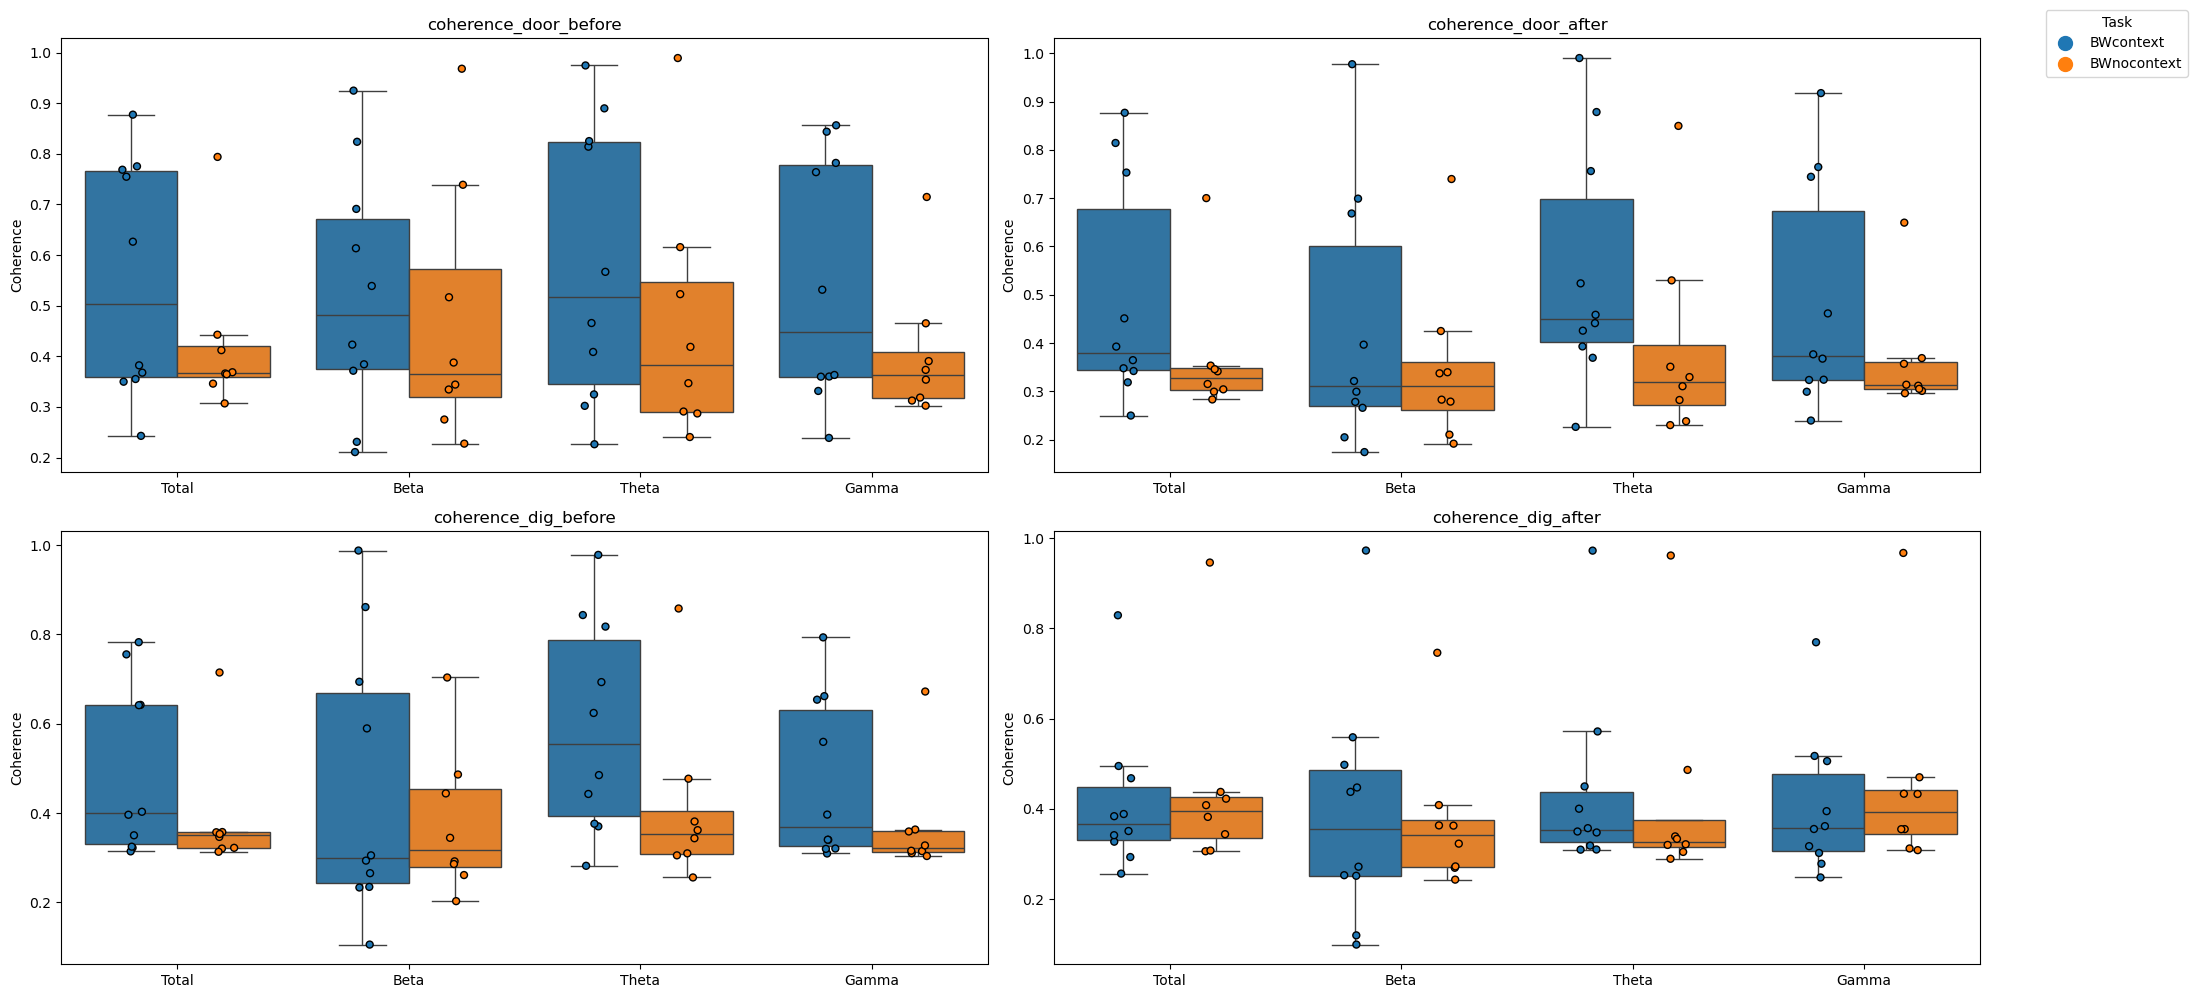

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()
for i, event in enumerate(['coherence_door_before', 'coherence_door_after', 'coherence_dig_before', 'coherence_dig_after']):
    event_data = con_data_df_clean[event]
    event_data_df = pd.DataFrame(event_data.tolist())
    event_data_df.reset_index(drop=True, inplace=True)
    event_data_df['rat_id'] = con_data_df_clean['rat_id'].reset_index(drop=True)
    event_data_df['task'] = con_data_df_clean['task'].reset_index(drop=True)
    event_data_df_melted = pd.melt(event_data_df, id_vars=['rat_id', 'task'], value_vars=['total', 'theta', 'beta', 'gamma'], var_name='band', value_name='coherence')
    sns.boxplot(x='band', y='coherence', hue='task', hue_order=['BWcontext', 'BWnocontext'], data=event_data_df_melted, showfliers=False, legend=False, ax=axs[i])
    sns.stripplot(x='band', y='coherence', hue='task', hue_order=['BWcontext', 'BWnocontext'], data=event_data_df_melted, dodge=True, edgecolor='black', linewidth=1, jitter=True, legend=False, ax=axs[i])
    axs[i].set_xticklabels(['Total', 'Beta', 'Theta', 'Gamma'])
    axs[i].set_title(event)
    axs[i].set_ylabel('Coherence')
    axs[i].set_xlabel('')

# Create custom legend handles and labels
from matplotlib.lines import Line2D
colors = {'BWnocontext': '#ff7f0e', 'BWcontext': '#1f77b4'}

# Create custom legend handles and labels
handles = [
    Line2D([0], [0], color=colors['BWcontext'], marker='o', linestyle='', markersize=10, label='BWcontext'),
    Line2D([0], [0], color=colors['BWnocontext'], marker='o', linestyle='', markersize=10, label='BWnocontext')
]

# Add the custom legend to the figure
fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1.1, 1), title='Task')
fig.savefig(f'C:\\Users\\{user}\\Dropbox\\CPLab\\results\\coherence_event_per_band.png', dpi=300)
plt.tight_layout()
plt.show()

5. Calculating Spectral connectivity and plotting it. Also plots the average of spectral connectivity in a separate plot

In [ ]:
epoch_data=mne_epoch_dig_before
con = mne_connectivity.spectral_connectivity_epochs(epoch_data, method='coh', sfreq=int(fs),
                                                   mode='cwt_morlet', cwt_freqs=freqs,
                                                   cwt_n_cycles=n_cycles, verbose=False)

coh = con.get_data(output='dense')
print(coh.shape)
indices = con.names
print("Connection indices:", indices)
fig, axs = plt.subplots(coh.shape[0],coh.shape[1] , figsize=(20, 20), sharex=True, sharey=True)
times = np.arange(0, 2, 1/fs)
aon_aon_con=[]
aon_vHp_con=[]
vHp_vHp_con=[]
for i in range(coh.shape[0]):
    for j in range(coh.shape[1]):
        axs[i,j].imshow(np.squeeze(coh[i,j,:,:]), extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
        axs[i,j].set_xlabel('Time (s)')
        axs[i,j].set_ylabel('Frequency (Hz)')
        axs[i,j].set_title('{} - {}'.format(indices[i], indices[j]))
        if 'AON' in indices[i] and 'AON' in indices[j]:
            aon_aon_con.append(coh[i,j,:,:])
        elif 'AON' in indices[j] and 'vHp' in indices[i]:
            aon_vHp_con.append(coh[i,j,:,:])
        elif 'vHp' in indices[i] and 'vHp' in indices[j]:
            vHp_vHp_con.append(coh[i,j,:,:])

#### Average the connections and plot them

def filtered_and_mean_con(con):
    print(' number of connections before filtering',len(con))
    filter_con=[x for x in con if x.any()>0]
    print('number of connections after filtering',len(filter_con))
    filter_con=np.array(filter_con)

    filter_con_mean=np.mean(filter_con, axis=0)
    return filter_con_mean
con_dict={'aon_aon':aon_aon_con,'aon_vHp':aon_vHp_con,'vHp_vHp':vHp_vHp_con}
fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
axs=axs.flatten()
for i, key in enumerate(con_dict):
    con=con_dict[key]
    con_mean=filtered_and_mean_con(con)
    axs[i].imshow(con_mean, extent=[times[0], times[-1], freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(key)
plt.show()


6. Plotting average connectivity across multiple experiments for a single rat

In [ ]:
print(con_data_df.head())


In [ ]:

rat_task_con_data=con_data_df[(con_data_df['rat_id']=='dk1') & (con_data_df['task']=='BWcontext')]
mne_epoch_dig_before_list=list(rat_task_con_data['mne_epoch_dig_before'])
aon_aon_con=[]
aon_vHp_con=[]
vHp_vHp_con=[]

for epoch_data in mne_epoch_dig_before_list:
#epoch_data=mne_epoch_dig_before
    print(epoch_data)
    con = mne_connectivity.spectral_connectivity_epochs(epoch_data, method='coh', sfreq=int(fs),
                                                    mode='cwt_morlet', cwt_freqs=freqs,
                                                    cwt_n_cycles=n_cycles, verbose=False)

    coh = con.get_data(output='dense')
    print(coh.shape)
    indices = con.names
    print("Connection indices:", indices)
    fig, axs = plt.subplots(coh.shape[0],coh.shape[1] , figsize=(20, 20), sharex=True, sharey=True)
    times = np.arange(0, 2, 1/fs)
    for i in range(coh.shape[0]):
        for j in range(coh.shape[1]):
            axs[i,j].imshow(np.squeeze(coh[i,j,:,:]), extent=[times[0], times[-1], freqs[0], freqs[-1]],
            aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
            axs[i,j].set_xlabel('Time (s)')
            axs[i,j].set_ylabel('Frequency (Hz)')
            axs[i,j].set_title('{} - {}'.format(indices[i], indices[j]))
            if 'AON' in indices[i] and 'AON' in indices[j]:
                aon_aon_con.append(coh[i,j,:,:])
            elif 'AON' in indices[j] and 'vHp' in indices[i]:
                aon_vHp_con.append(coh[i,j,:,:])
            elif 'vHp' in indices[i] and 'vHp' in indices[j]:
                vHp_vHp_con.append(coh[i,j,:,:])

#### Average the connections and plot them

def filtered_and_mean_con(con):
    print(' number of connections before filtering',len(con))
    filter_con=[x for x in con if x.any()>0]
    print('number of connections after filtering',len(filter_con))
    filter_con=np.array(filter_con)

    filter_con_mean=np.mean(filter_con, axis=0)
    return filter_con_mean
con_dict={'aon_aon':aon_aon_con,'aon_vHp':aon_vHp_con,'vHp_vHp':vHp_vHp_con}
fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
axs=axs.flatten()
for i, key in enumerate(con_dict):
    con=con_dict[key]
    con_mean=filtered_and_mean_con(con)
    axs[i].imshow(con_mean, extent=[times[0], times[-1], freqs[0], freqs[-1]],
        aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title(key)
plt.show()



7. Now we will compare Aon_vHp connectivity between BWcontext and BWnocontext, through events

['mne_epoch_door_before', 'mne_epoch_door_after', 'mne_epoch_dig_before', 'mne_epoch_dig_after']
['dk1' 'dk3' 'dk5' 'dk6']


C:\Users\sinha\AppData\Local\Temp\ipykernel_25740\3768359679.py:34: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con = mne_connectivity.spectral_connectivity_epochs(event_epoch, method='coh', sfreq=int(fs),
C:\Users\sinha\AppData\Local\Temp\ipykernel_25740\3768359679.py:34: RuntimeWarning: fmin=1.000 Hz corresponds to 2.000 < 5 cycles based on the epoch length 2.000 sec, need at least 5.000 sec epochs or fmin=2.500. Spectrum estimate will be unreliable.
  con = mne_connectivity.spectral_connectivity_epochs(event_epoch, method='coh', sfreq=int(fs),
C:\Users\sinha\AppData\Local\Temp\ipykernel_25740\3768359679.py:34: RuntimeWarning: There were no Annotations stored in <EpochsArray | 20 events (all good), 0 – 2 s (baseline off), ~2.5 MB, data loaded,
 '1': 20>, so metadata was not modified.
  con = mne_connectivity.spectral_connectivity_epochs(event_epoch, me

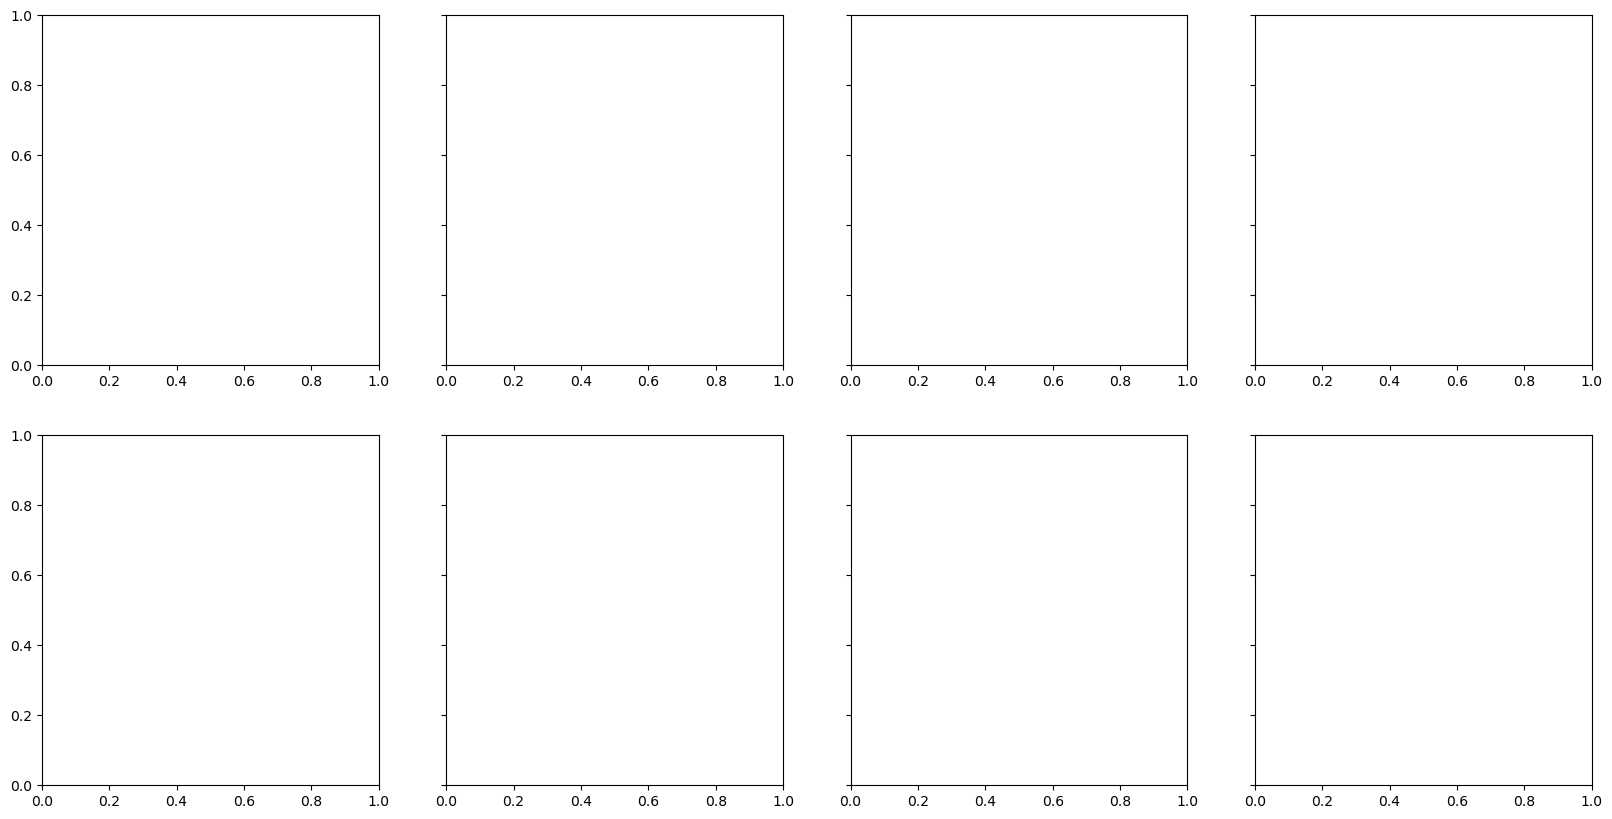

In [9]:


event_list=['mne_epoch_door_before','mne_epoch_door_after','mne_epoch_dig_before','mne_epoch_dig_after']

print(event_list)
con_data_df_clean=con_data_df[con_data_df['rat_id']!='dk3']
BWcontext_data=con_data_df[(con_data_df['task']=='BWcontext')]
BWnocontext_data=con_data_df[(con_data_df['task']=='BWnocontext')]
task_data_dict={'BWcontext':BWcontext_data,'BWnocontext':BWnocontext_data}


rat_list=np.unique(con_data_df['rat_id'])
print(rat_list)
fig, axs=plt.subplots(2,4, figsize=(20,10), sharey=True)
all_con_data=[]
all_con_data_mean=[]
for task_num,task_name in enumerate(task_data_dict.keys()):
        task_data=task_data_dict[task_name]
    #print(task_name)
    # for rat_num, rat_name in enumerate(rat_list):
    #     rat_task_data=task_data[task_data['rat_id']==rat_name]
        row=[task_name]
    #     #print(row)
        row_2=[task_name]
        for event in event_list:
            #print(event)
            event_epoch_list=task_data[event]
            aon_vHp_con=[]
            for event_epoch in event_epoch_list:
                    #print(row,event, event_epoch) 
                    fmin=1
                    fmax=100
                    freqs = np.arange(fmin,fmax)
                    n_cycles = freqs/2
                           
                    con = mne_connectivity.spectral_connectivity_epochs(event_epoch, method='coh', sfreq=int(fs),
                                                         mode='cwt_morlet', cwt_freqs=freqs,
                                                         cwt_n_cycles=n_cycles, verbose=False, fmin=1, fmax=100, faverage=False)
                    coh = con.get_data(output='dense')
                    indices = con.names
                    

                    for i in range(coh.shape[0]):
                        for j in range(coh.shape[1]):
                            if 'AON' in indices[j] and 'vHp' in indices[i]:
                                aon_vHp_con.append(coh[i,j,:,:])
            row.append(np.mean(aon_vHp_con, axis=0))
            row_2.append(np.mean(aon_vHp_con))
        all_con_data.append(row)                    
        all_con_data_mean.append(row_2)
# Convert all_con_data to a DataFrame for easier manipulation
all_con_data_df = pd.DataFrame(all_con_data, columns=['task'] + event_list)

fs=2000


C:\Users\sinha\AppData\Local\Temp\ipykernel_25740\1325762273.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vmin = all_con_data_df[event_list].applymap(np.min).min().min()
C:\Users\sinha\AppData\Local\Temp\ipykernel_25740\1325762273.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vmax = all_con_data_df[event_list].applymap(np.max).max().max()


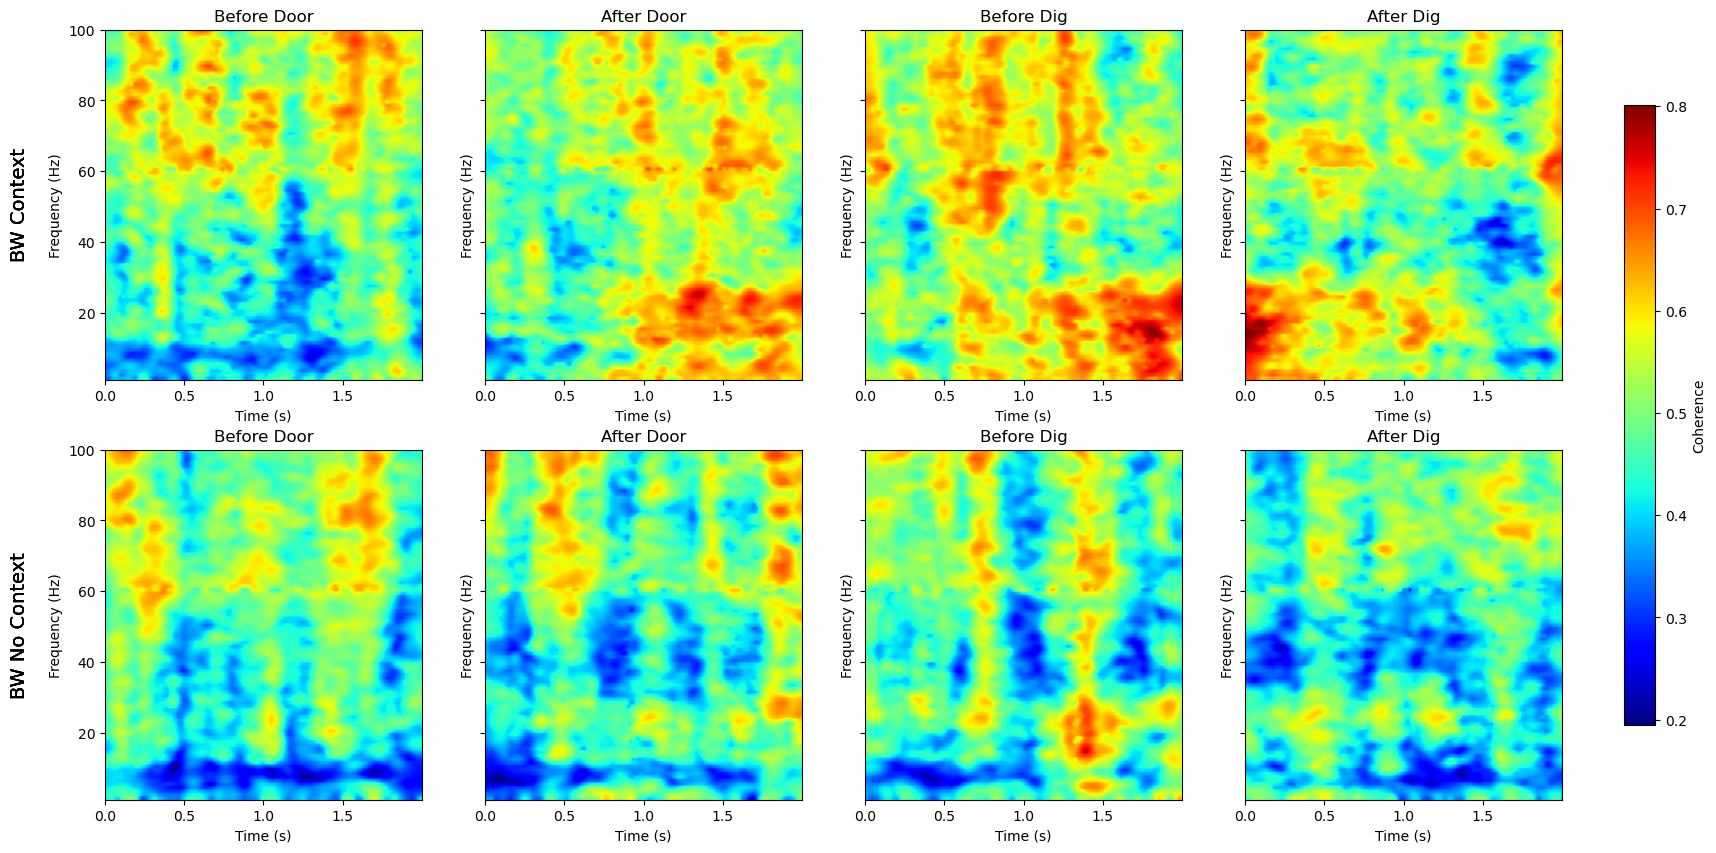

In [10]:

times=np.arange(0, 2, 1/fs)
fig, axs=plt.subplots(2,4, figsize=(20,10), sharey=True)
vmin = all_con_data_df[event_list].applymap(np.min).min().min()
vmax = all_con_data_df[event_list].applymap(np.max).max().max()
event_names=['Before Door','After Door','Before Dig','After Dig']
for i, event in enumerate(event_list):
    axs[0,i].imshow(all_con_data_df[event][0], extent=[times[0], times[-1], 1, 100],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
    axs[0,i].set_xlabel('Time (s)')
    axs[0,i].set_ylabel('Frequency (Hz)')
    axs[0,i].set_title(event_names[i])

    axs[1,i].imshow(all_con_data_df[event][1], extent=[times[0], times[-1], 1, 100],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
    axs[1,i].set_xlabel('Time (s)')
    axs[1,i].set_ylabel('Frequency (Hz)')
    axs[1,i].set_title(event_names[i])
    axs[0,0].text(-0.3, 0.5, 'BW Context', transform=axs[0,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
    axs[1,0].text(-0.3, 0.5, 'BW No Context', transform=axs[1,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
    # Add a colorbar
cbar = fig.colorbar(axs[0,0].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Coherence')
fig.savefig(f'C:\\Users\\{user}\\Dropbox\\CPLab\\results\\coherence_event_spectrogram.png', dpi=300)
plt.show()

In [ ]:

all_con_data_mean=pd.DataFrame(all_con_data_mean, columns=['task','before_door','after_door','before_dig','after_dig'])
import matplotlib.pyplot as plt
import seaborn as sns
# Filter out non-numeric columns
numeric_columns = all_con_data_mean.select_dtypes(include=[float, int]).columns

# Group by task and calculate the mean for each event
grouped_data = all_con_data_mean.groupby('task')[numeric_columns].mean()

# Extract the relevant columns and their names
columns_to_plot = grouped_data.columns
x_labels = columns_to_plot

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each task's mean values
for task in grouped_data.index:
    ax.plot(x_labels, grouped_data.loc[task, columns_to_plot], label=task)
    
# Overlay stripplot for individual values
# for task in grouped_data.index:
#     task_data = all_con_data_mean[all_con_data_mean['task'] == task]
#     for col in columns_to_plot:
#         sns.stripplot(x=[col] * len(task_data), y=task_data[col], ax=ax, jitter=True, label=None, hue=task_data['task'], alpha=0.5)

# Set the x-axis ticks and labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add labels and title
ax.set_xlabel('Events')
ax.set_ylabel('Mean Coherence')
ax.set_title('Mean Coherence Gamma (30-80 Hz)')

# Add a legend
ax.legend(title='Task')

# Show the plot
plt.tight_layout()
fig.savefig(f'C:\\Users\\{user}\\Dropbox\\CPLab\\results\\mean_coherence_gamma.png')
plt.show()

8. Attempt to do this for individual rat

In [ ]:

event_list=['mne_epoch_door_before','mne_epoch_door_after','mne_epoch_dig_before','mne_epoch_dig_after']

print(event_list)

BWcontext_data=con_data_df[(con_data_df['task']=='BWcontext')]
BWnocontext_data=con_data_df[(con_data_df['task']=='BWnocontext')]
task_data_dict={'BWcontext':BWcontext_data,'BWnocontext':BWnocontext_data}


rat_list=np.unique(con_data_df['rat_id'])
print(rat_list)
rat_list=['dk1', 'dk5', 'dk6']
fig, axs=plt.subplots(2,4, figsize=(20,10), sharey=True)
all_con_data_mean=[]

for rat_id in rat_list:
    all_con_data=[]
    for task_num,task_name in enumerate(task_data_dict.keys()):
            
            task_data=task_data_dict[task_name]
        #print(task_name)
        # for rat_num, rat_name in enumerate(rat_list):
            rat_task_data=task_data[task_data['rat_id']==rat_id]
            row=[task_name]
            row_2=[rat_id,task_name]  
        # #print(row)
            
            for event in event_list:
                #print(event)
                event_epoch_list=list(rat_task_data[event])
                aon_vHp_con=[]
                for event_epoch in event_epoch_list:
                        #print(row,event, event_epoch)        
                        con = mne_connectivity.spectral_connectivity_epochs(event_epoch, method='coh', sfreq=int(fs),
                                                            mode='cwt_morlet', cwt_freqs=freqs,
                                                            cwt_n_cycles=n_cycles, verbose=False, fmin=30, fmax=80)
                        coh = con.get_data(output='dense')
                        indices = con.names
                        

                        for i in range(coh.shape[0]):
                            for j in range(coh.shape[1]):
                                if 'AON' in indices[j] and 'vHp' in indices[i]:
                                    aon_vHp_con.append(coh[i,j,:,:])
                row.append(np.mean(aon_vHp_con, axis=0))
                row_2.append(np.mean(aon_vHp_con))
            all_con_data.append(row)                    
            all_con_data_mean.append(row_2)
    # Convert all_con_data to a DataFrame for easier manipulation
    all_con_data_df = pd.DataFrame(all_con_data, columns=[ 'task'] + event_list)
    times=np.arange(0, 2, 1/fs)
    fs=2000
    fig, axs=plt.subplots(2,4, figsize=(20,10), sharey=True)
    fig.suptitle(rat_id)
    vmin = all_con_data_df[event_list].applymap(np.min).min().min()
    vmax = all_con_data_df[event_list].applymap(np.max).max().max()
    event_names=['Before Door','After Door','Before Dig','After Dig']
    for i, event in enumerate(event_list):
        #if not all_con_data_df[event].isnull().all():
            axs[0,i].imshow(all_con_data_df[event][0], extent=[times[0], times[-1], freqs[0], freqs[-1]],
                aspect='auto', origin='lower', cmap='jet', vmin=0, vmax=1)
            axs[0,i].set_xlabel('Time (s)')
            axs[0,i].set_ylabel('Frequency (Hz)')
            axs[0,i].set_title(event_names[i])

            axs[1,i].imshow(all_con_data_df[event][1], extent=[times[0], times[-1], freqs[0], freqs[-1]],
                        aspect='auto', origin='lower', cmap='jet', vmin=0, vmax=1)
            axs[1,i].set_xlabel('Time (s)')
            axs[1,i].set_ylabel('Frequency (Hz)')
            axs[1,i].set_title(event_names[i])
            axs[0,0].text(-0.3, 0.5, 'BW Context', transform=axs[0,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
            axs[1,0].text(-0.3, 0.5, 'BW No Context', transform=axs[1,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
        # Add a colorbar
    cbar = fig.colorbar(axs[0,0].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label('Coherence')

Calculating Granger Causality for a single Epoch

=============================== End of Working code ======================================

In [ ]:
### I will calculate average coherence for baseline across all rats

single_baseline_epoch=con_data_df['mne_baseline'].iloc[0]
print(single_baseline_epoch)
fmin=1
fmax=100
freqs = np.arange(fmin,fmax)
n_cycles = freqs/2

con=mne_connectivity.spectral_connectivity_time(single_baseline_epoch, method='coh', sfreq=int(fs), freqs=freqs,fmin=fmin, fmax=fmax, mode='cwt_morlet', verbose=True, n_cycles=n_cycles)
coh = con.get_data(output='dense')
print(coh.shape)

indices = con.names
aon_vhp_con=[]

for i in range(coh.shape[1]):
    for j in range(coh.shape[2]):
        if 'AON' in indices[j] and 'vHp' in indices[i]:
            aon_vhp_con.append(coh[0,i,j,:])

aon_vhp_con_mean=np.mean(aon_vhp_con, axis=0)

plt.plot(freqs, aon_vhp_con_mean, label='AON-vHp', color='blue')

####### This is working for a single experiment. Now we will attempt to average it across rats #################


In [ ]:
bwcontext_con_data_df=pd.DataFrame(bwcontext_con_data)
bwcontext_con_data = bwcontext_con_data_df.to_numpy()
print(bwcontext_con_data.shape)

bwcontext_con_data_mean=bwcontext_con_data_df.mean(axis=0)
print(bwcontext_con_data_mean.shape)

In [ ]:
# Ensure bwcontext_con_data is defined and contains lists
#bwcontext_con_data = [sublist for sublist in bwcontext_con_data if isinstance(sublist, list) and len(sublist) > 0]
#bwcontext_con_data=np.array(bwcontext_con_data, dtype=object)
bwcontext_con_data_mean=np.mean(bwcontext_con_data, axis=0)

bwnocontext_con_data = [sublist for sublist in bwnocontext_con_data if isinstance(sublist, list) and len(sublist) > 0]
bwnocontext_con_data=np.array(bwnocontext_con_data, dtype=object)
bwnocontext_con_data_mean=np.mean(bwnocontext_con_data, axis=0)

plt.plot(freqs, bwcontext_con_data_mean, label='BW Context', color='blue')
plt.plot(freqs, bwnocontext_con_data_mean, label='BW No Context', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Coherence')
plt.legend()

Interesting things are happening with Pre door stuff. So I will now attempt to plot pre door coherence across epochs

In [ ]:
single_rat_single_exp_data = con_data_df[(con_data_df['rat_id']=='dk1') & (con_data_df['task']=='BWcontext')]
pre_door_exp_data = single_rat_single_exp_data.iloc[0]['mne_epoch_door_before']
# If this is an MNE Epochs object or numpy array:
if hasattr(pre_door_exp_data, 'ch_names'):
    channel_names = pre_door_exp_data.ch_names
    print(channel_names)
else:
    # Try to get channel info from metadata if available
    try:
        channel_names = single_rat_single_exp_data.iloc[0]['channel_names']
    except:
        print("Could not find channel names directly. Please check the data structure.")

# Start from higher minimum frequency (e.g. 4 Hz) to avoid long wavelets
freqs = np.arange(4, 100)
fs = 2000
times = np.arange(0, 2, 1/fs)

# Use fixed number of cycles for lower frequencies and more cycles for higher frequencies
n_cycles = np.zeros(len(freqs))
n_cycles[freqs <= 30] = 3  # Use 3 cycles for lower frequencies
n_cycles[freqs > 30] = freqs[freqs > 30]/4  # More cycles for higher frequencies

for i, epoch in enumerate(pre_door_exp_data):
    print(epoch.shape)
    con = mne_connectivity.spectral_connectivity_time(
        epoch[None,:,:], 
        method='coh',
        sfreq=int(fs),
        freqs=freqs,
        n_cycles=n_cycles,
        verbose=True, 
        average=False
    )
    
    coh = con.get_data(output='dense')
    print(coh.shape)
    channel_names_2 = con.names    
    print(channel_names_2)
    for i in range(coh.shape[1]):
        for j in range(coh.shape[2]):
            if 'AON' in channel_names[j] and 'vHp' in channel_names[i]:
                print('something')
                #aon_vHp_con.append(coh[i,j,:,:])

In [ ]:
single_rat_single_exp_data=con_data_df[(con_data_df['rat_id']=='dk1') & (con_data_df['task']=='BWcontext')]
pre_door_exp_data=single_rat_single_exp_data.iloc[0]['mne_epoch_door_before']
print(pre_door_exp_data)
freqs = np.arange(1,100)
fs=2000
times = np.arange(0, 2, 1/fs)

n_cycles = freqs/2
channel_names = pre_door_exp_data.ch_names
n_epochs = len(pre_door_exp_data)
print(n_epochs)
fig,axs=plt.subplots(1,n_epochs, figsize=(100,5), sharey=True)
for epoch_num,epoch in enumerate(pre_door_exp_data):
    print(epoch.shape)
    aon_vHp_con=[]
    con = mne_connectivity.spectral_connectivity_epochs(epoch[None,:,:], method='coh', sfreq=int(fs),
                                                            mode='cwt_morlet', cwt_freqs=freqs,
                                                            cwt_n_cycles=n_cycles, verbose=False, fmin=1, fmax=100)
    coh = con.get_data(output='dense')
    indices = con.names
    print(coh.shape, indices)    
    for i in range(coh.shape[0]):
        for j in range(coh.shape[1]):
            if 'AON' in channel_names[j] and 'vHp' in channel_names[i]:
                print('something')
                aon_vHp_con.append(coh[i,j,:,:])
    aon_vHp_con=np.mean(aon_vHp_con, axis=0)
    axs[epoch_num].imshow(np.squeeze(aon_vHp_con), extent=[times[0], times[-1], freqs[0], freqs[-1]],
              aspect='auto', origin='lower', cmap='jet', vmin=0, vmax=1)
    axs[epoch_num].set_xlabel('Time (s)')
    axs[epoch_num].set_ylabel('Frequency (Hz)')
    axs[epoch_num].set_title('Epoch {}'.format(epoch_num))
plt.show()
    

In [ ]:
from mne_connectivity import SpectralConnectivity
import matplotlib.pyplot as plt
epochs=pre_door_exp_data
# Parameters
fmin, fmax = 8.0, 12.0  # Frequency range of interest
sfreq = epochs.info['sfreq']  # Sampling frequency

# Compute connectivity for all epochs
for i, epoch in enumerate(epochs):
    con = SpectralConnectivity(
        epoch[None, :, :],  # Add dimension for single epoch
        method='coh',       # Coherence
        sfreq=sfreq,
        fmin=fmin,
        fmax=fmax,
        faverage=False,     # Keep time and frequency dimensions
        verbose=False
    )

    # Extract data and metadata
    freqs = con.attrs['freqs']  # Frequencies
    times = con.attrs['times']  # Times
    data = con.get_data(output='dense')  # Shape: (n_channels, n_channels, n_freqs, n_times)

    # Choose a channel pair (e.g., Ch1 and Ch2)
    ch1, ch2 = 0, 1
    coherence_data = data[ch1, ch2, :, :]  # Shape: (n_freqs, n_times)

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    plt.imshow(
        coherence_data,
        aspect='auto',
        origin='lower',
        extent=[times[0], times[-1], freqs[0], freqs[-1]],
        cmap='viridis'
    )
    plt.colorbar(label='Coherence')
    plt.title(f'Coherence Heatmap for Epoch {i + 1} (Ch{ch1 + 1} vs Ch{ch2 + 1})')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


In [ ]:
from mne_connectivity import SpectroTemporalConnectivity
import numpy as np
import matplotlib.pyplot as plt

# Initialize connectivity object
con = SpectroTemporalConnectivity(
    data=epochs,
    method='coh',
    sfreq=epochs.info['sfreq'],
    fmin=1.0,
    fmax=40.0,
    n_jobs=1,
    verbose=False
)

# Calculate coherence
con.compute()

# Extract data and metadata
coh_data = con.get_data(output='dense')  # Shape: (n_pairs, n_freqs, n_times)
freqs = con.freqs
times = con.times

# Create heatmap for each channel pair
n_channels = len(epochs.ch_names)
fig, axs = plt.subplots(n_channels, n_channels, figsize=(20, 20))

for i in range(n_channels):
    for j in range(n_channels):
        im = axs[i, j].imshow(
            coh_data[i, j],
            aspect='auto',
            origin='lower',
            extent=[times[0], times[-1], freqs[0], freqs[-1]],
            cmap='jet'
        )
        axs[i, j].set_title(f'{epochs.ch_names[i]} - {epochs.ch_names[j]}')
        if i == n_channels-1:
            axs[i, j].set_xlabel('Time (s)')
        if j == 0:
            axs[i, j].set_ylabel('Frequency (Hz)')

# Add colorbar
fig.colorbar(im, ax=axs.ravel().tolist())
plt.tight_layout()
plt.show()

=============================================== End of Code ========================================================

In [ ]:
print(coh.shape)

Do this for each rat

In [ ]:

times=np.arange(0, 2, 1/fs)
fs=2000
fig, axs=plt.subplots(2,4, figsize=(20,10), sharey=True)
vmin = all_con_data_df[event_list].applymap(np.min).min().min()
vmax = all_con_data_df[event_list].applymap(np.max).max().max()
event_names=['Before Door','After Door','Before Dig','After Dig']
for i, event in enumerate(event_list):
    axs[0,i].imshow(all_con_data_df[event][0], extent=[times[0], times[-1], freqs[0], freqs[-1]],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
    axs[0,i].set_xlabel('Time (s)')
    axs[0,i].set_ylabel('Frequency (Hz)')
    axs[0,i].set_title(event_names[i])

    axs[1,i].imshow(all_con_data_df[event][1], extent=[times[0], times[-1], freqs[0], freqs[-1]],
                   aspect='auto', origin='lower', cmap='jet', vmin=vmin, vmax=vmax)
    axs[1,i].set_xlabel('Time (s)')
    axs[1,i].set_ylabel('Frequency (Hz)')
    axs[1,i].set_title(event_names[i])
    axs[0,0].text(-0.3, 0.5, 'BW Context', transform=axs[0,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
    axs[1,0].text(-0.3, 0.5, 'BW No Context', transform=axs[1,0].transAxes, fontsize=14, verticalalignment='center', rotation=90)
    # Add a colorbar
cbar = fig.colorbar(axs[0,0].images[0], ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Coherence')

In [ ]:
import numpy as np
import pandas as pd


# Group by 'task' and calculate the mean for each column
BWcontext_data = all_con_data_df[all_con_data_df['task'] == 'BWcontext']
BWnocontext_data = all_con_data_df[all_con_data_df['task'] == 'BWnocontext']
task_data_dict = {'BWcontext': BWcontext_data, 'BWnocontext': BWnocontext_data}
for task_name in task_data_dict.keys():
    task_data = task_data_dict[task_name]
    # Initialize an empty list to store the values
    all_values = []

    # Iterate over each row in the task_data
    for index, row in task_data.iterrows():
        # Extract the stored values in each column and append to the list
        for event in event_list:
            if pd.all.notnull(row[event]):
                all_values.append(row[event])

    # Convert the list to a numpy array and take the mean
    all_values_array = np.array(all_values)
    task_averages = np.mean(all_values_array, axis=0)
    task_averages = task_data.mean()
    print(task_averages)


In [ ]:


for rati, rat_name in rat_list:

    rat_task_con_data=con_data_df[(con_data_df['rat_id']=='dk1') & (con_data_df['task']=='BWcontext')]
    mne_epoch_dig_before_list=list(rat_task_con_data['mne_epoch_dig_before'])
    aon_aon_con=[]
    aon_vHp_con=[]
    vHp_vHp_con=[]

    for epoch_data in mne_epoch_dig_before_list:
    #epoch_data=mne_epoch_dig_before
        print(epoch_data)
        con = mne_connectivity.spectral_connectivity_epochs(epoch_data, method='coh', sfreq=int(fs),
                                                        mode='cwt_morlet', cwt_freqs=freqs,
                                                        cwt_n_cycles=n_cycles, verbose=False)

        coh = con.get_data(output='dense')
        print(coh.shape)
        indices = con.names
        print("Connection indices:", indices)
        fig, axs = plt.subplots(coh.shape[0],coh.shape[1] , figsize=(20, 20), sharex=True, sharey=True)
        times = np.arange(0, 2, 1/fs)
        for i in range(coh.shape[0]):
            for j in range(coh.shape[1]):
                axs[i,j].imshow(np.squeeze(coh[i,j,:,:]), extent=[times[0], times[-1], freqs[0], freqs[-1]],
                aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
                axs[i,j].set_xlabel('Time (s)')
                axs[i,j].set_ylabel('Frequency (Hz)')
                axs[i,j].set_title('{} - {}'.format(indices[i], indices[j]))
                if 'AON' in indices[i] and 'AON' in indices[j]:
                    aon_aon_con.append(coh[i,j,:,:])
                elif 'AON' in indices[j] and 'vHp' in indices[i]:
                    aon_vHp_con.append(coh[i,j,:,:])
                elif 'vHp' in indices[i] and 'vHp' in indices[j]:
                    vHp_vHp_con.append(coh[i,j,:,:])

#### Average the connections and plot them

    def filtered_and_mean_con(con):
        print(' number of connections before filtering',len(con))
        filter_con=[x for x in con if x.any()>0]
        print('number of connections after filtering',len(filter_con))
        filter_con=np.array(filter_con)

        filter_con_mean=np.mean(filter_con, axis=0)
        return filter_con_mean
    con_dict={'aon_aon':aon_aon_con,'aon_vHp':aon_vHp_con,'vHp_vHp':vHp_vHp_con}
    fig, axs=plt.subplots(1,3, figsize=(20,5), sharey=True)
    axs=axs.flatten()
    for i, key in enumerate(con_dict):
        con=con_dict[key]
        con_mean=filtered_and_mean_con(con)
        axs[i].imshow(con_mean, extent=[times[0], times[-1], freqs[0], freqs[-1]],
            aspect='auto', origin='lower', cmap='jet', vmin=coh.min(), vmax=coh.max())
        axs[i].set_xlabel('Time (s)')
        axs[i].set_ylabel('Frequency (Hz)')
        axs[i].set_title(key)
    plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_reshaped = mne_epoch_door_before.reshape(-1, 4000)  # Reshape to (n_epochs * n_channels, n_times)
data_normalized = scaler.fit_transform(data_reshaped)
data_normalized = data_normalized.reshape(len(epochs), len(lfp_channels), 4000)  # Reshape back to (n_epochs, n_channels, n_times)

info = mne.create_info(ch_names=channels, sfreq=2000.0, ch_types='misc')



In [ ]:
# Create MNE EpochsArray
mne_epoch_door_before = mne.EpochsArray(data_normalized, info)

# Plot the data
fig = mne_epoch_door_before.plot(picks=np.arange(1, 8), n_epochs=10)


fig.show()

# info=mne.create_info(ch_names=channels,sfreq=2000.0,ch_types='misc')
# mne_epoch_door_before=mne.EpochsArray(mne_epoch_door_before,info)
# #fig,axs=plt.subplots(1,1,figsize=(30,10))
# fig=mne_epoch_door_before.plot(picks=np.arange(1,8),n_epochs=10)
# fig.show()

In [ ]:
!pip install mne_connectivity

In [ ]:
import mne
import mne_connectivity


In [ ]:
%matplotlib inline
print(coh.shape)
plt.imshow(np.squeeze(coh[,:,:]), extent=[0, 2, freqs[0], freqs[-1]],
           aspect='auto', origin='lower', cmap='jet')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [ ]:
print(coh)

In [ ]:
coh = con.get_data()

fig, axs = plt.subplots(6, 6, figsize=(30, 30))
axs = axs.flatten()

for i in range(coh.shape[0]):
    im = axs[i].imshow(np.squeeze(coh[i, :, :]), extent=[0, 2, freqs[0], freqs[-1]],
                       aspect='auto', origin='lower', cmap='jet')
    axs[i].set_xlabel('Time (s)')
    axs[i].set_ylabel('Frequency (Hz)')
    axs[i].set_title('Channel {}'.format(i))

# Add a colorbar
fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)

plt.tight_layout()
plt.show()